In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

# Feture Engineering:Removing null values

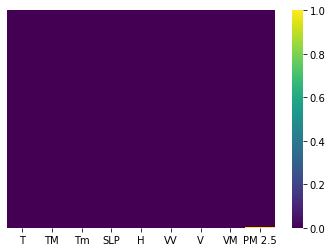

In [10]:
#Checkfor null values using heatmap
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=True)

Interpretation:Can see a null value at the bottom right on PM2.5

In [13]:
#Removing null values 
df=df.dropna()

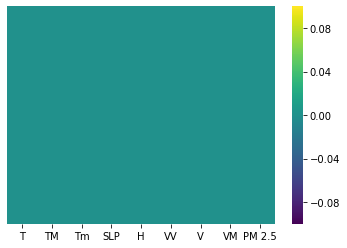

In [14]:
#Checkfor null values using heatmap after removing them
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=True)

Interpretation:Can see that the data is clean

# Define Independent and Dependent features

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Train test split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
X_train.shape

(632, 8)

In [18]:
y_train.shape

(632,)

In [19]:
X_test.shape

(272, 8)

In [20]:
y_test.shape

(272,)

# Model :XGBoost

In [21]:
import xgboost as xgb

In [22]:
xgbregressor=xgb.XGBRegressor()

In [23]:
xgbregressor.fit(X_train,y_train)

[10:36:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [26]:
print('Coeeficient of determination R^2 value on train data {}'.format(xgbregressor.score(X_train,y_train)))

Coeeficient of determination R^2 value on train data 0.81046267886849


In [27]:
print('Coeeficient of determination R^2 value on test data {}'.format(xgbregressor.score(X_test,y_test)))

Coeeficient of determination R^2 value on test data 0.5149429844254286


# Interpretation:
From the above R^2 values we can clearly see that we have a overfitting issue

We have high variance between the R^2 value of train and test data.

Lets evaluate the model before solving the overfitting issue

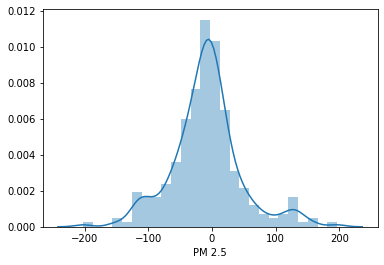

In [28]:
prediction=xgbregressor.predict(X_test)
sns.distplot(y_test-prediction)

# Interpretation:
In the distance plot,we can see a very close normally distributed curve which indicated the model is good

# Hyperparameter tuning

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start =100 ,stop=1200,num=12)]

#various learning rate parameters
learning_rate=['0.04','0.2','0.3','0.5','0.6','0.7']


#maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]


#Subsample parameters values
subsample=[0.8,0.7,0.5]


#Minimum chiled weight parameters
min_child_parameters=[3,4,5,6,7]

In [33]:


random_grid={
            'n_estimators':n_estimators,
             'learning_rate':learning_rate,
             'max_depth':max_depth,
             'subsample':subsample,
             'min_child_parameters':min_child_parameters
             
             }

print(random_grid)




{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.04', '0.2', '0.3', '0.5', '0.6', '0.7'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.8, 0.7, 0.5], 'min_child_parameters': [3, 4, 5, 6, 7]}


In [34]:
#creting the base model
regressor=xgb.XGBRegressor()

In [36]:

#Random search of parameters using  fold validation
#Random serach using 100 diffrenet combinations
random_regressor=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,
                                    scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42, n_jobs = 1)

In [37]:
random_regressor.fit(X_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=6, max_depth=10, learning_rate=0.5 
[11:48:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=6, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=6, max_depth=10, learning_rate=0.5 
[11:48:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=6, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=6, max_depth=10, learning_rate=0.5 
[11:48:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=6, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=6, max_depth=10, learning_rate=0.5 
[11:48:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=6, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.5 
[11:48:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.5 
[11:48:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.5 
[11:48:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.5 
[11:48:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=30, learning_rate=0.2 
[11:48:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=30, learning_rate=0.2, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=30, learning_rate=0.2 
[11:48:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=30, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=30, learning_rate=0.2 
[11:48:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=30, learning_rate=0.2, total=   1.1s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=30, learning_rate=0.2 
[11:48:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=30, learning_rate=0.2, total=   1.2s
[CV] subsample=0.8, n_estimators=1000, min_child_parameters=7, max_depth=10, learning_rate=0.04 
[11:48:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_parameters=7, max_depth=10, learning_rate=0.04, total=   3.2s
[CV] subsample=0.8, n_estimators=1000, min_child_parameters=7, max_depth=10, learning_rate=0.04 
[11:48:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_parameters=7, max_depth=10, learning_rate=0.04, total=   3.1s
[CV] subsample=0.8, n_estimators=1000, min_child_parameters=7, max_depth=10, learning_rate=0.04 
[11:48:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_parameters=7, max_depth=10, learning_rate=0.04, total=   3.1s
[CV] subsample=0.8, n_estimators=1000, min_child_parameters=7, max_depth=10, learning_rate=0.04 
[11:48:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_parameters=7, max_depth=10, learning_rate=0.04, total=   3.0s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=3, max_depth=10, learning_rate=0.5 
[11:48:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=3, max_depth=10, learning_rate=0.5, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=3, max_depth=10, learning_rate=0.5 
[11:48:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=3, max_depth=10, learning_rate=0.5, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=3, max_depth=10, learning_rate=0.5 
[11:48:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=3, max_depth=10, learning_rate=0.5, total=   0.3s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=3, max_depth=10, learning_rate=0.5 
[11:48:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=3, max_depth=10, learning_rate=0.5, total=   0.3s
[CV] subsample=0.7, n_estimators=500, min_child_parameters=6, max_depth=5, learning_rate=0.5 
[11:48:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_parameters=6, max_depth=5, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_parameters=6, max_depth=5, learning_rate=0.5 
[11:48:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_parameters=6, max_depth=5, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_parameters=6, max_depth=5, learning_rate=0.5 
[11:48:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_parameters=6, max_depth=5, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=500, min_child_parameters=6, max_depth=5, learning_rate=0.5 
[11:48:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=500, min_child_parameters=6, max_depth=5, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=25, learning_rate=0.3 
[11:48:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=25, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=25, learning_rate=0.3 
[11:48:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=25, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=25, learning_rate=0.3 
[11:48:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=25, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=25, learning_rate=0.3 
[11:48:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=25, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=10, learning_rate=0.2 
[11:48:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=10, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=10, learning_rate=0.2 
[11:48:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=10, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=10, learning_rate=0.2 
[11:48:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=10, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=10, learning_rate=0.2 
[11:48:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=10, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.5 
[11:48:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.5 
[11:48:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.5 
[11:48:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.5 
[11:48:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=1000, min_child_parameters=5, max_depth=5, learning_rate=0.3 
[11:48:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_parameters=5, max_depth=5, learning_rate=0.3, total=   1.0s
[CV] subsample=0.8, n_estimators=1000, min_child_parameters=5, max_depth=5, learning_rate=0.3 
[11:48:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_parameters=5, max_depth=5, learning_rate=0.3, total=   1.0s
[CV] subsample=0.8, n_estimators=1000, min_child_parameters=5, max_depth=5, learning_rate=0.3 
[11:48:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_parameters=5, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=1000, min_child_parameters=5, max_depth=5, learning_rate=0.3 
[11:48:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1000, min_child_parameters=5, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=5, max_depth=15, learning_rate=0.5 
[11:48:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=5, max_depth=15, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=5, max_depth=15, learning_rate=0.5 
[11:48:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=5, max_depth=15, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=5, max_depth=15, learning_rate=0.5 
[11:48:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=5, max_depth=15, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=5, max_depth=15, learning_rate=0.5 
[11:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=5, max_depth=15, learning_rate=0.5, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04 
[11:48:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04 
[11:48:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04 
[11:48:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04 
[11:48:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04, total=   1.1s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=15, learning_rate=0.04 
[11:48:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=15, learning_rate=0.04, total=   3.6s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=15, learning_rate=0.04 
[11:49:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=15, learning_rate=0.04, total=   4.1s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=15, learning_rate=0.04 
[11:49:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=15, learning_rate=0.04, total=   3.8s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=15, learning_rate=0.04 
[11:49:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=15, learning_rate=0.04, total=   3.3s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=4, max_depth=30, learning_rate=0.04 
[11:49:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=4, max_depth=30, learning_rate=0.04, total=   4.5s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=4, max_depth=30, learning_rate=0.04 
[11:49:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=4, max_depth=30, learning_rate=0.04, total=   4.7s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=4, max_depth=30, learning_rate=0.04 
[11:49:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=4, max_depth=30, learning_rate=0.04, total=   6.0s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=4, max_depth=30, learning_rate=0.04 
[11:49:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=4, max_depth=30, learning_rate=0.04, total=   4.3s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:49:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:49:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:49:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:49:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.5 
[11:49:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.5 
[11:49:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.5 
[11:49:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.5, total=   0.7s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.5 
[11:49:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:49:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.3s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:49:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:49:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.2s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:49:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.2s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=4, max_depth=30, learning_rate=0.5 
[11:49:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=4, max_depth=30, learning_rate=0.5, total=   1.1s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=4, max_depth=30, learning_rate=0.5 
[11:49:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=4, max_depth=30, learning_rate=0.5, total=   0.9s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=4, max_depth=30, learning_rate=0.5 
[11:49:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=4, max_depth=30, learning_rate=0.5, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=4, max_depth=30, learning_rate=0.5 
[11:49:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=4, max_depth=30, learning_rate=0.5, total=   0.9s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=3, max_depth=10, learning_rate=0.5 
[11:49:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=3, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=3, max_depth=10, learning_rate=0.5 
[11:49:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=3, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=3, max_depth=10, learning_rate=0.5 
[11:49:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=3, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=3, max_depth=10, learning_rate=0.5 
[11:49:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=3, max_depth=10, learning_rate=0.5, total=   0.6s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=30, learning_rate=0.6 
[11:49:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=30, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=30, learning_rate=0.6 
[11:49:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=30, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=30, learning_rate=0.6 
[11:49:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=30, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=30, learning_rate=0.6 
[11:49:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=30, learning_rate=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=700, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:49:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=700, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:49:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=700, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:49:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=700, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:49:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=700, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=20, learning_rate=0.7 
[11:49:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=20, learning_rate=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=20, learning_rate=0.7 
[11:49:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=20, learning_rate=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=20, learning_rate=0.7 
[11:49:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=20, learning_rate=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=20, learning_rate=0.7 
[11:49:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=20, learning_rate=0.7, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3 
[11:49:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3 
[11:49:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3 
[11:49:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3 
[11:50:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=3, max_depth=30, learning_rate=0.2 
[11:50:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=3, max_depth=30, learning_rate=0.2, total=   1.3s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=3, max_depth=30, learning_rate=0.2 
[11:50:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=3, max_depth=30, learning_rate=0.2, total=   1.2s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=3, max_depth=30, learning_rate=0.2 
[11:50:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=3, max_depth=30, learning_rate=0.2, total=   1.2s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=3, max_depth=30, learning_rate=0.2 
[11:50:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=3, max_depth=30, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=4, max_depth=30, learning_rate=0.6 
[11:50:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=4, max_depth=30, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=4, max_depth=30, learning_rate=0.6 
[11:50:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=4, max_depth=30, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=4, max_depth=30, learning_rate=0.6 
[11:50:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=4, max_depth=30, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=4, max_depth=30, learning_rate=0.6 
[11:50:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=4, max_depth=30, learning_rate=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=300, min_child_parameters=4, max_depth=30, learning_rate=0.2 
[11:50:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_parameters=4, max_depth=30, learning_rate=0.2, total=   1.4s
[CV] subsample=0.5, n_estimators=300, min_child_parameters=4, max_depth=30, learning_rate=0.2 
[11:50:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_parameters=4, max_depth=30, learning_rate=0.2, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_parameters=4, max_depth=30, learning_rate=0.2 
[11:50:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_parameters=4, max_depth=30, learning_rate=0.2, total=   1.3s
[CV] subsample=0.5, n_estimators=300, min_child_parameters=4, max_depth=30, learning_rate=0.2 
[11:50:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_parameters=4, max_depth=30, learning_rate=0.2, total=   1.4s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=20, learning_rate=0.5 
[11:50:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=20, learning_rate=0.5 
[11:50:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=20, learning_rate=0.5 
[11:50:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=20, learning_rate=0.5 
[11:50:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=7, max_depth=20, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=3, max_depth=30, learning_rate=0.5 
[11:50:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=3, max_depth=30, learning_rate=0.5, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=3, max_depth=30, learning_rate=0.5 
[11:50:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=3, max_depth=30, learning_rate=0.5, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=3, max_depth=30, learning_rate=0.5 
[11:50:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=3, max_depth=30, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=3, max_depth=30, learning_rate=0.5 
[11:50:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=3, max_depth=30, learning_rate=0.5, total=   0.9s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=5, learning_rate=0.2 
[11:50:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=5, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=5, learning_rate=0.2 
[11:50:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=5, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=5, learning_rate=0.2 
[11:50:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=5, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=5, learning_rate=0.2 
[11:50:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=5, learning_rate=0.2, total=   1.2s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:50:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:50:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:50:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:50:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.7 
[11:50:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.7 
[11:50:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.7 
[11:50:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.7 
[11:50:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=5, max_depth=10, learning_rate=0.2 
[11:50:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=5, max_depth=10, learning_rate=0.2, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=5, max_depth=10, learning_rate=0.2 
[11:50:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=5, max_depth=10, learning_rate=0.2, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=5, max_depth=10, learning_rate=0.2 
[11:50:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=5, max_depth=10, learning_rate=0.2, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=5, max_depth=10, learning_rate=0.2 
[11:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=5, max_depth=10, learning_rate=0.2, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04 
[11:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04 
[11:50:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04 
[11:50:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04, total=   0.9s
[CV] subsample=0.5, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04 
[11:50:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_parameters=7, max_depth=30, learning_rate=0.04, total=   0.9s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=6, max_depth=5, learning_rate=0.2 
[11:50:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=6, max_depth=5, learning_rate=0.2, total=   1.2s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=6, max_depth=5, learning_rate=0.2 
[11:50:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=6, max_depth=5, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=6, max_depth=5, learning_rate=0.2 
[11:50:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=6, max_depth=5, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=6, max_depth=5, learning_rate=0.2 
[11:50:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=6, max_depth=5, learning_rate=0.2, total=   1.2s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.04 
[11:50:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.04, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.04 
[11:50:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.04, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.04 
[11:50:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.04, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.04 
[11:50:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.04, total=   0.4s
[CV] subsample=0.7, n_estimators=1000, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:50:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.7, n_estimators=1000, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:50:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.7, n_estimators=1000, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:50:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.2s
[CV] subsample=0.7, n_estimators=1000, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:50:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1000, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=7, max_depth=5, learning_rate=0.7 
[11:50:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=7, max_depth=5, learning_rate=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=7, max_depth=5, learning_rate=0.7 
[11:50:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=7, max_depth=5, learning_rate=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=7, max_depth=5, learning_rate=0.7 
[11:50:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=7, max_depth=5, learning_rate=0.7, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=7, max_depth=5, learning_rate=0.7 
[11:50:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=7, max_depth=5, learning_rate=0.7, total=   0.4s
[CV] subsample=0.5, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.5 
[11:50:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.5, total=   0.9s
[CV] subsample=0.5, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.5 
[11:50:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.5, total=   0.9s
[CV] subsample=0.5, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.5 
[11:50:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.5, total=   0.9s
[CV] subsample=0.5, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.5 
[11:50:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=5, max_depth=5, learning_rate=0.5 
[11:50:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=5, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=5, max_depth=5, learning_rate=0.5 
[11:50:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=5, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=5, max_depth=5, learning_rate=0.5 
[11:50:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=5, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=5, max_depth=5, learning_rate=0.5 
[11:50:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=5, max_depth=5, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=10, learning_rate=0.7 
[11:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=10, learning_rate=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=10, learning_rate=0.7 
[11:50:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=10, learning_rate=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=10, learning_rate=0.7 
[11:50:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=10, learning_rate=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=10, learning_rate=0.7 
[11:50:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=10, learning_rate=0.7, total=   0.5s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=20, learning_rate=0.5 
[11:50:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=20, learning_rate=0.5, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=20, learning_rate=0.5 
[11:50:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=20, learning_rate=0.5, total=   0.7s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=20, learning_rate=0.5 
[11:50:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=20, learning_rate=0.5, total=   0.7s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=20, learning_rate=0.5 
[11:50:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=20, learning_rate=0.5, total=   0.7s
[CV] subsample=0.5, n_estimators=1000, min_child_parameters=7, max_depth=5, learning_rate=0.5 
[11:50:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_parameters=7, max_depth=5, learning_rate=0.5, total=   0.9s
[CV] subsample=0.5, n_estimators=1000, min_child_parameters=7, max_depth=5, learning_rate=0.5 
[11:50:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_parameters=7, max_depth=5, learning_rate=0.5, total=   0.9s
[CV] subsample=0.5, n_estimators=1000, min_child_parameters=7, max_depth=5, learning_rate=0.5 
[11:50:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_parameters=7, max_depth=5, learning_rate=0.5, total=   0.9s
[CV] subsample=0.5, n_estimators=1000, min_child_parameters=7, max_depth=5, learning_rate=0.5 
[11:51:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1000, min_child_parameters=7, max_depth=5, learning_rate=0.5, total=   0.9s
[CV] subsample=0.7, n_estimators=1100, min_child_parameters=3, max_depth=5, learning_rate=0.04 
[11:51:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_parameters=3, max_depth=5, learning_rate=0.04, total=   1.7s
[CV] subsample=0.7, n_estimators=1100, min_child_parameters=3, max_depth=5, learning_rate=0.04 
[11:51:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_parameters=3, max_depth=5, learning_rate=0.04, total=   1.7s
[CV] subsample=0.7, n_estimators=1100, min_child_parameters=3, max_depth=5, learning_rate=0.04 
[11:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_parameters=3, max_depth=5, learning_rate=0.04, total=   1.7s
[CV] subsample=0.7, n_estimators=1100, min_child_parameters=3, max_depth=5, learning_rate=0.04 
[11:51:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1100, min_child_parameters=3, max_depth=5, learning_rate=0.04, total=   1.7s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=30, learning_rate=0.04 
[11:51:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=30, learning_rate=0.04, total=   5.9s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=30, learning_rate=0.04 
[11:51:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=30, learning_rate=0.04, total=   5.8s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=30, learning_rate=0.04 
[11:51:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=30, learning_rate=0.04, total=   5.5s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=30, learning_rate=0.04 
[11:51:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=30, learning_rate=0.04, total=   5.9s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=30, learning_rate=0.3 
[11:51:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=30, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=30, learning_rate=0.3 
[11:51:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=30, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=30, learning_rate=0.3 
[11:51:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=30, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=30, learning_rate=0.3 
[11:51:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=30, learning_rate=0.3, total=   1.2s
[CV] subsample=0.5, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3 
[11:51:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3, total=   1.2s
[CV] subsample=0.5, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3 
[11:51:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3, total=   1.1s
[CV] subsample=0.5, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3 
[11:51:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3, total=   1.1s
[CV] subsample=0.5, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3 
[11:51:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_parameters=5, max_depth=10, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=4, max_depth=10, learning_rate=0.7 
[11:51:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=4, max_depth=10, learning_rate=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=4, max_depth=10, learning_rate=0.7 
[11:51:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=4, max_depth=10, learning_rate=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=4, max_depth=10, learning_rate=0.7 
[11:51:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=4, max_depth=10, learning_rate=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=4, max_depth=10, learning_rate=0.7 
[11:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=4, max_depth=10, learning_rate=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=6, max_depth=20, learning_rate=0.2 
[11:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=6, max_depth=20, learning_rate=0.2, total=   1.8s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=6, max_depth=20, learning_rate=0.2 
[11:51:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=6, max_depth=20, learning_rate=0.2, total=   1.6s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=6, max_depth=20, learning_rate=0.2 
[11:51:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=6, max_depth=20, learning_rate=0.2, total=   1.7s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=6, max_depth=20, learning_rate=0.2 
[11:51:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=6, max_depth=20, learning_rate=0.2, total=   1.7s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.04 
[11:51:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.04, total=   2.7s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.04 
[11:51:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.04, total=   2.7s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.04 
[11:51:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.04, total=   2.7s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.04 
[11:51:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.04, total=   2.7s
[CV] subsample=0.5, n_estimators=1200, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:52:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   1.0s
[CV] subsample=0.5, n_estimators=1200, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:52:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=1200, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:52:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   1.0s
[CV] subsample=0.5, n_estimators=1200, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:52:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1200, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   1.0s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:52:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:52:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:52:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:52:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.0s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=7, max_depth=30, learning_rate=0.7 
[11:52:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=7, max_depth=30, learning_rate=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=7, max_depth=30, learning_rate=0.7 
[11:52:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=7, max_depth=30, learning_rate=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=7, max_depth=30, learning_rate=0.7 
[11:52:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=7, max_depth=30, learning_rate=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=7, max_depth=30, learning_rate=0.7 
[11:52:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=7, max_depth=30, learning_rate=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.04 
[11:52:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.04, total=   1.4s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.04 
[11:52:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.04, total=   1.4s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.04 
[11:52:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.04, total=   1.4s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.04 
[11:52:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.04, total=   1.4s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=15, learning_rate=0.6 
[11:52:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=15, learning_rate=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=15, learning_rate=0.6 
[11:52:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=15, learning_rate=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=15, learning_rate=0.6 
[11:52:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=15, learning_rate=0.6, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=15, learning_rate=0.6 
[11:52:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=3, max_depth=15, learning_rate=0.6, total=   0.9s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=5, learning_rate=0.5 
[11:52:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=5, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=5, learning_rate=0.5 
[11:52:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=5, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=5, learning_rate=0.5 
[11:52:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=5, learning_rate=0.5, total=   0.8s
[CV] subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=5, learning_rate=0.5 
[11:52:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=1200, min_child_parameters=5, max_depth=5, learning_rate=0.5, total=   0.8s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.6 
[11:52:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.6 
[11:52:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.6 
[11:52:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.6, total=   0.4s
[CV] subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.6 
[11:52:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=100, min_child_parameters=6, max_depth=15, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=6, max_depth=20, learning_rate=0.2 
[11:52:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=6, max_depth=20, learning_rate=0.2, total=   0.9s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=6, max_depth=20, learning_rate=0.2 
[11:52:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=6, max_depth=20, learning_rate=0.2, total=   0.9s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=6, max_depth=20, learning_rate=0.2 
[11:52:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=6, max_depth=20, learning_rate=0.2, total=   0.9s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=6, max_depth=20, learning_rate=0.2 
[11:52:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=6, max_depth=20, learning_rate=0.2, total=   0.9s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.5 
[11:52:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.5 
[11:52:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.5 
[11:52:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.5 
[11:52:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=10, learning_rate=0.5, total=   0.5s
[CV] subsample=0.5, n_estimators=300, min_child_parameters=6, max_depth=15, learning_rate=0.04 
[11:52:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_parameters=6, max_depth=15, learning_rate=0.04, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_parameters=6, max_depth=15, learning_rate=0.04 
[11:52:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_parameters=6, max_depth=15, learning_rate=0.04, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_parameters=6, max_depth=15, learning_rate=0.04 
[11:52:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_parameters=6, max_depth=15, learning_rate=0.04, total=   1.2s
[CV] subsample=0.5, n_estimators=300, min_child_parameters=6, max_depth=15, learning_rate=0.04 
[11:52:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=300, min_child_parameters=6, max_depth=15, learning_rate=0.04, total=   1.3s
[CV] subsample=0.8, n_estimators=300, min_child_parameters=5, max_depth=20, learning_rate=0.5 
[11:52:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_parameters=5, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=300, min_child_parameters=5, max_depth=20, learning_rate=0.5 
[11:52:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_parameters=5, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=300, min_child_parameters=5, max_depth=20, learning_rate=0.5 
[11:52:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_parameters=5, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.8, n_estimators=300, min_child_parameters=5, max_depth=20, learning_rate=0.5 
[11:52:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=300, min_child_parameters=5, max_depth=20, learning_rate=0.5, total=   0.4s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=4, max_depth=25, learning_rate=0.3 
[11:52:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=4, max_depth=25, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=4, max_depth=25, learning_rate=0.3 
[11:52:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=4, max_depth=25, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=4, max_depth=25, learning_rate=0.3 
[11:52:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=4, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=4, max_depth=25, learning_rate=0.3 
[11:52:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=4, max_depth=25, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.6 
[11:52:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.6 
[11:52:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.6 
[11:52:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.6 
[11:52:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.04 
[11:52:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.04, total=   3.9s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.04 
[11:52:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.04, total=   3.9s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.04 
[11:52:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.04, total=   3.9s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.04 
[11:52:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.04, total=   3.9s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=4, max_depth=10, learning_rate=0.04 
[11:52:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=4, max_depth=10, learning_rate=0.04, total=   2.5s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=4, max_depth=10, learning_rate=0.04 
[11:52:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=4, max_depth=10, learning_rate=0.04, total=   2.5s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=4, max_depth=10, learning_rate=0.04 
[11:53:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=4, max_depth=10, learning_rate=0.04, total=   2.5s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=4, max_depth=10, learning_rate=0.04 
[11:53:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=4, max_depth=10, learning_rate=0.04, total=   2.5s
[CV] subsample=0.8, n_estimators=600, min_child_parameters=4, max_depth=5, learning_rate=0.7 
[11:53:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_parameters=4, max_depth=5, learning_rate=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=600, min_child_parameters=4, max_depth=5, learning_rate=0.7 
[11:53:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_parameters=4, max_depth=5, learning_rate=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=600, min_child_parameters=4, max_depth=5, learning_rate=0.7 
[11:53:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_parameters=4, max_depth=5, learning_rate=0.7, total=   0.5s
[CV] subsample=0.8, n_estimators=600, min_child_parameters=4, max_depth=5, learning_rate=0.7 
[11:53:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=600, min_child_parameters=4, max_depth=5, learning_rate=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=30, learning_rate=0.7 
[11:53:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=30, learning_rate=0.7, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=30, learning_rate=0.7 
[11:53:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=30, learning_rate=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=30, learning_rate=0.7 
[11:53:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=30, learning_rate=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=30, learning_rate=0.7 
[11:53:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=5, max_depth=30, learning_rate=0.7, total=   0.7s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=5, max_depth=10, learning_rate=0.6 
[11:53:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=5, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=5, max_depth=10, learning_rate=0.6 
[11:53:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=5, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=5, max_depth=10, learning_rate=0.6 
[11:53:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=5, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=1100, min_child_parameters=5, max_depth=10, learning_rate=0.6 
[11:53:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1100, min_child_parameters=5, max_depth=10, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=3, max_depth=5, learning_rate=0.5 
[11:53:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_parameters=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=3, max_depth=5, learning_rate=0.5 
[11:53:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=3, max_depth=5, learning_rate=0.5 
[11:53:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.8, n_estimators=100, min_child_parameters=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=3, max_depth=5, learning_rate=0.5 
[11:53:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=3, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=5, learning_rate=0.6 
[11:53:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=5, learning_rate=0.6 
[11:53:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=5, learning_rate=0.6 
[11:53:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=5, learning_rate=0.6 
[11:53:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=5, learning_rate=0.6, total=   0.3s
[CV] subsample=0.5, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.04 
[11:53:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.04, total=   4.9s
[CV] subsample=0.5, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.04 
[11:53:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.04, total=   4.8s
[CV] subsample=0.5, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.04 
[11:53:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.04, total=   4.6s
[CV] subsample=0.5, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.04 
[11:53:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.04, total=   4.8s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:53:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:53:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:53:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=30, learning_rate=0.6 
[11:53:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=500, min_child_parameters=7, max_depth=30, learning_rate=0.6, total=   0.7s
[CV] subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.3 
[11:53:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.3 
[11:53:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.3 
[11:53:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.3 
[11:53:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=500, min_child_parameters=6, max_depth=15, learning_rate=0.3, total=   0.6s
[CV] subsample=0.7, n_estimators=400, min_child_parameters=3, max_depth=25, learning_rate=0.6 
[11:53:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_parameters=3, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=400, min_child_parameters=3, max_depth=25, learning_rate=0.6 
[11:53:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_parameters=3, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=400, min_child_parameters=3, max_depth=25, learning_rate=0.6 
[11:53:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_parameters=3, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=400, min_child_parameters=3, max_depth=25, learning_rate=0.6 
[11:53:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_parameters=3, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.6 
[11:53:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.6 
[11:53:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.6 
[11:53:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.6 
[11:53:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=3, max_depth=30, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=25, learning_rate=0.7 
[11:53:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=25, learning_rate=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=25, learning_rate=0.7 
[11:53:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=25, learning_rate=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=25, learning_rate=0.7 
[11:53:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=25, learning_rate=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=25, learning_rate=0.7 
[11:53:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=25, learning_rate=0.7, total=   0.5s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=10, learning_rate=0.04 
[11:53:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=10, learning_rate=0.04, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=10, learning_rate=0.04 
[11:53:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=10, learning_rate=0.04, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=10, learning_rate=0.04 
[11:53:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=10, learning_rate=0.04, total=   0.3s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=10, learning_rate=0.04 
[11:53:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=10, learning_rate=0.04, total=   0.3s
[CV] subsample=0.7, n_estimators=700, min_child_parameters=7, max_depth=5, learning_rate=0.3 
[11:53:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_parameters=7, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_parameters=7, max_depth=5, learning_rate=0.3 
[11:53:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_parameters=7, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_parameters=7, max_depth=5, learning_rate=0.3 
[11:53:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_parameters=7, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=700, min_child_parameters=7, max_depth=5, learning_rate=0.3 
[11:53:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=700, min_child_parameters=7, max_depth=5, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=30, learning_rate=0.7 
[11:53:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=30, learning_rate=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=30, learning_rate=0.7 
[11:53:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=30, learning_rate=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=30, learning_rate=0.7 
[11:53:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=30, learning_rate=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=30, learning_rate=0.7 
[11:53:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=30, learning_rate=0.7, total=   0.3s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=25, learning_rate=0.04 
[11:53:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=25, learning_rate=0.04, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=25, learning_rate=0.04 
[11:53:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=25, learning_rate=0.04, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=25, learning_rate=0.04 
[11:53:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=25, learning_rate=0.04, total=   0.5s
[CV] subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=25, learning_rate=0.04 
[11:53:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=100, min_child_parameters=4, max_depth=25, learning_rate=0.04, total=   0.5s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=5, max_depth=5, learning_rate=0.04 
[11:53:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=5, max_depth=5, learning_rate=0.04, total=   1.4s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=5, max_depth=5, learning_rate=0.04 
[11:53:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=5, max_depth=5, learning_rate=0.04, total=   1.4s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=5, max_depth=5, learning_rate=0.04 
[11:53:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=5, max_depth=5, learning_rate=0.04, total=   1.4s
[CV] subsample=0.8, n_estimators=900, min_child_parameters=5, max_depth=5, learning_rate=0.04 
[11:53:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=900, min_child_parameters=5, max_depth=5, learning_rate=0.04, total=   1.4s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.7 
[11:53:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.7 
[11:53:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.7 
[11:54:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.7, total=   0.6s
[CV] subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.7 
[11:54:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=800, min_child_parameters=5, max_depth=25, learning_rate=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=400, min_child_parameters=4, max_depth=15, learning_rate=0.2 
[11:54:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_parameters=4, max_depth=15, learning_rate=0.2, total=   1.3s
[CV] subsample=0.5, n_estimators=400, min_child_parameters=4, max_depth=15, learning_rate=0.2 
[11:54:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_parameters=4, max_depth=15, learning_rate=0.2, total=   1.2s
[CV] subsample=0.5, n_estimators=400, min_child_parameters=4, max_depth=15, learning_rate=0.2 
[11:54:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_parameters=4, max_depth=15, learning_rate=0.2, total=   1.2s
[CV] subsample=0.5, n_estimators=400, min_child_parameters=4, max_depth=15, learning_rate=0.2 
[11:54:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_parameters=4, max_depth=15, learning_rate=0.2, total=   1.3s
[CV] subsample=0.7, n_estimators=400, min_child_parameters=5, max_depth=30, learning_rate=0.04 
[11:54:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_parameters=5, max_depth=30, learning_rate=0.04, total=   2.5s
[CV] subsample=0.7, n_estimators=400, min_child_parameters=5, max_depth=30, learning_rate=0.04 
[11:54:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_parameters=5, max_depth=30, learning_rate=0.04, total=   2.4s
[CV] subsample=0.7, n_estimators=400, min_child_parameters=5, max_depth=30, learning_rate=0.04 
[11:54:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_parameters=5, max_depth=30, learning_rate=0.04, total=   2.3s
[CV] subsample=0.7, n_estimators=400, min_child_parameters=5, max_depth=30, learning_rate=0.04 
[11:54:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=400, min_child_parameters=5, max_depth=30, learning_rate=0.04, total=   2.4s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=10, learning_rate=0.2 
[11:54:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=10, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=10, learning_rate=0.2 
[11:54:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=10, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=10, learning_rate=0.2 
[11:54:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=10, learning_rate=0.2, total=   0.7s
[CV] subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=10, learning_rate=0.2 
[11:54:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=300, min_child_parameters=6, max_depth=10, learning_rate=0.2, total=   0.7s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=5, max_depth=25, learning_rate=0.7 
[11:54:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=5, max_depth=25, learning_rate=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=5, max_depth=25, learning_rate=0.7 
[11:54:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=5, max_depth=25, learning_rate=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=5, max_depth=25, learning_rate=0.7 
[11:54:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=5, max_depth=25, learning_rate=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=5, max_depth=25, learning_rate=0.7 
[11:54:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=5, max_depth=25, learning_rate=0.7, total=   0.9s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=5, max_depth=20, learning_rate=0.3 
[11:54:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=5, max_depth=20, learning_rate=0.3, total=   1.2s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=5, max_depth=20, learning_rate=0.3 
[11:54:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=5, max_depth=20, learning_rate=0.3, total=   1.2s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=5, max_depth=20, learning_rate=0.3 
[11:54:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=5, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=5, max_depth=20, learning_rate=0.3 
[11:54:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=5, max_depth=20, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=5, learning_rate=0.5 
[11:54:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=5, learning_rate=0.5 
[11:54:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=5, learning_rate=0.5 
[11:54:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=5, learning_rate=0.5 
[11:54:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=4, max_depth=5, learning_rate=0.5, total=   0.2s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.6 
[11:54:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.6 
[11:54:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.6 
[11:54:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.6, total=   0.8s
[CV] subsample=0.5, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.6 
[11:54:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=800, min_child_parameters=3, max_depth=20, learning_rate=0.6, total=   0.8s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.6 
[11:54:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.6 
[11:54:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.6 
[11:54:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.6 
[11:54:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=900, min_child_parameters=6, max_depth=5, learning_rate=0.6, total=   0.7s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=5, learning_rate=0.7 
[11:54:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=5, learning_rate=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=5, learning_rate=0.7 
[11:54:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=5, learning_rate=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=5, learning_rate=0.7 
[11:54:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=5, learning_rate=0.7, total=   0.2s
[CV] subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=5, learning_rate=0.7 
[11:54:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=100, min_child_parameters=7, max_depth=5, learning_rate=0.7, total=   0.2s
[CV] subsample=0.5, n_estimators=200, min_child_parameters=6, max_depth=10, learning_rate=0.3 
[11:54:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_parameters=6, max_depth=10, learning_rate=0.3, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_parameters=6, max_depth=10, learning_rate=0.3 
[11:54:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_parameters=6, max_depth=10, learning_rate=0.3, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_parameters=6, max_depth=10, learning_rate=0.3 
[11:54:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_parameters=6, max_depth=10, learning_rate=0.3, total=   0.6s
[CV] subsample=0.5, n_estimators=200, min_child_parameters=6, max_depth=10, learning_rate=0.3 
[11:54:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=200, min_child_parameters=6, max_depth=10, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:54:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:54:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:54:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=7, max_depth=15, learning_rate=0.2 
[11:54:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=7, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.3 
[11:54:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.3 
[11:54:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.3 
[11:54:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.3 
[11:54:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=200, min_child_parameters=3, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=5, max_depth=25, learning_rate=0.5 
[11:54:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=5, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=5, max_depth=25, learning_rate=0.5 
[11:54:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=5, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=5, max_depth=25, learning_rate=0.5 
[11:54:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=5, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.8, n_estimators=400, min_child_parameters=5, max_depth=25, learning_rate=0.5 
[11:54:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=400, min_child_parameters=5, max_depth=25, learning_rate=0.5, total=   0.5s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=4, max_depth=10, learning_rate=0.2 
[11:54:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=4, max_depth=10, learning_rate=0.2, total=   1.3s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=4, max_depth=10, learning_rate=0.2 
[11:54:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=4, max_depth=10, learning_rate=0.2, total=   1.3s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=4, max_depth=10, learning_rate=0.2 
[11:54:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=4, max_depth=10, learning_rate=0.2, total=   1.4s
[CV] subsample=0.5, n_estimators=1100, min_child_parameters=4, max_depth=10, learning_rate=0.2 
[11:54:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=1100, min_child_parameters=4, max_depth=10, learning_rate=0.2, total=   1.3s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:54:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:54:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   0.6s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:54:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   0.5s
[CV] subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.6 
[11:54:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.7, n_estimators=600, min_child_parameters=6, max_depth=20, learning_rate=0.6, total=   0.6s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.3 
[11:54:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.3 
[11:54:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.3 
[11:54:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.3 
[11:54:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=800, min_child_parameters=7, max_depth=25, learning_rate=0.3, total=   0.9s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=15, learning_rate=0.2 
[11:54:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=15, learning_rate=0.2 
[11:54:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=15, learning_rate=0.2 
[11:54:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=15, learning_rate=0.2 
[11:55:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=1200, min_child_parameters=4, max_depth=15, learning_rate=0.2, total=   1.1s
[CV] subsample=0.5, n_estimators=400, min_child_parameters=3, max_depth=20, learning_rate=0.7 
[11:55:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_parameters=3, max_depth=20, learning_rate=0.7, total=   0.7s
[CV] subsample=0.5, n_estimators=400, min_child_parameters=3, max_depth=20, learning_rate=0.7 
[11:55:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_parameters=3, max_depth=20, learning_rate=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=400, min_child_parameters=3, max_depth=20, learning_rate=0.7 
[11:55:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_parameters=3, max_depth=20, learning_rate=0.7, total=   0.6s
[CV] subsample=0.5, n_estimators=400, min_child_parameters=3, max_depth=20, learning_rate=0.7 
[11:55:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.5, n_estimators=400, min_child_parameters=3, max_depth=20, learning_rate=0.7, total=   0.6s
[CV] subsample=0.8, n_estimators=700, min_child_parameters=3, max_depth=10, learning_rate=0.04 
[11:55:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_parameters=3, max_depth=10, learning_rate=0.04, total=   2.4s
[CV] subsample=0.8, n_estimators=700, min_child_parameters=3, max_depth=10, learning_rate=0.04 
[11:55:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_parameters=3, max_depth=10, learning_rate=0.04, total=   2.4s
[CV] subsample=0.8, n_estimators=700, min_child_parameters=3, max_depth=10, learning_rate=0.04 
[11:55:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_parameters=3, max_depth=10, learning_rate=0.04, total=   2.4s
[CV] subsample=0.8, n_estimators=700, min_child_parameters=3, max_depth=10, learning_rate=0.04 
[11:55:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  subsample=0.8, n_estimators=700, min_child_parameters=3, max_depth=10, learning_rate=0.04, total=   2.4s
[11:55:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  7.0min finished
C:\Users\K T KUMAR\Anaconda33\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'learning_rate': ['0.04', '0.2', '0.3',
                                                          '0.5', '0.6', '0.7'],
                             

In [38]:
random_regressor.best_params_

{'subsample': 0.5,
 'n_estimators': 200,
 'min_child_parameters': 7,
 'max_depth': 30,
 'learning_rate': '0.04'}

In [39]:
random_regressor.best_score_

-3216.9539432446686

In [40]:
print('XGBoost regression score:{}'.format(random_regressor.best_score_))

XGBoost regression score:-3216.9539432446686


Interpretation:

#Compare to the previous models the Random Forest score is much closer to zero indicating less error: 
#XGBoost regression score:-3216.9539432446686
#Random Forest regression score:-2794.5137821400776 
#Decision Tree regression score:-3468.135532063188
#Lasso regression score:-3493.719817078534 
#Ridge regression score:-3501.974141971 
#Linear regression score:-3576.1976560478724

# Model evaluation after Hyperparameter tuning

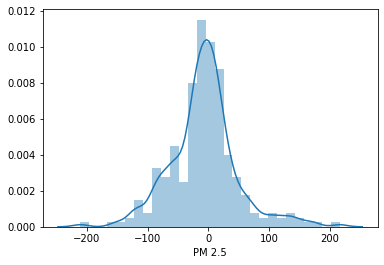

In [47]:
predict=random_regressor.predict(X_test)
sns.distplot(y_test-predict)

# Regression Evaluation Metrics

In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 40.07999466727762
MSE: 3190.5763971597266
RMSE: 56.48518741369038


In [ ]:
#Comparing the error of XGBoost and RandomForest


#XGBoost:
#MAE: 40.07999466727762
#MSE: 3190.5763971597266
#RMSE: 56.48518741369038
    
#RandomForest
#MAE: 40.31671308602534
#MSE: 3207.122697719825
#RMSE: 56.63146384934637

# Save the model

In [45]:
import pickle 

In [46]:
file=open('xgboost_regressor.pkl','wb')
pickle.dump(random_regressor,file)